# 1. Import Packages


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 2. Load dataset


In [3]:
# load datasets for two subjects, Math and Portuguese
mat = pd.read_csv("student-mat.csv", sep=';')
por = pd.read_csv("student-por.csv", sep=';')


# 3. Data Preparation


In [4]:
# merge datasets
df = pd.concat([mat,por])


In [5]:
# rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [6]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


 ** Let's have a look at the variables **
 

In [7]:

# look for missing values
df.isnull().any()


school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

** We have no missing values! **

# 4. EDA






## 4.1 Final Grade Distribution

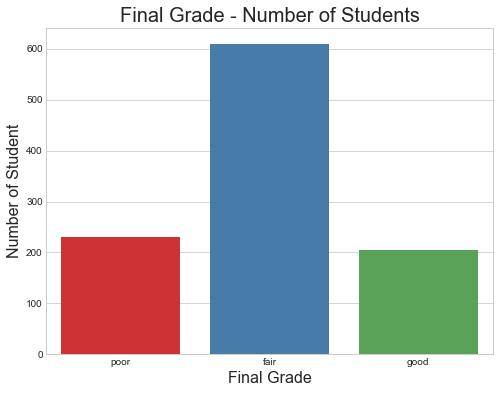

In [8]:
# Final Grade Countplot
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
tem = sns.countplot(df.final_grade, order=["poor","fair","good"], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)
plt.show()


** The fair student has a high proportion which is about 60 percent. **

## 4.2 Correlation Heatmap

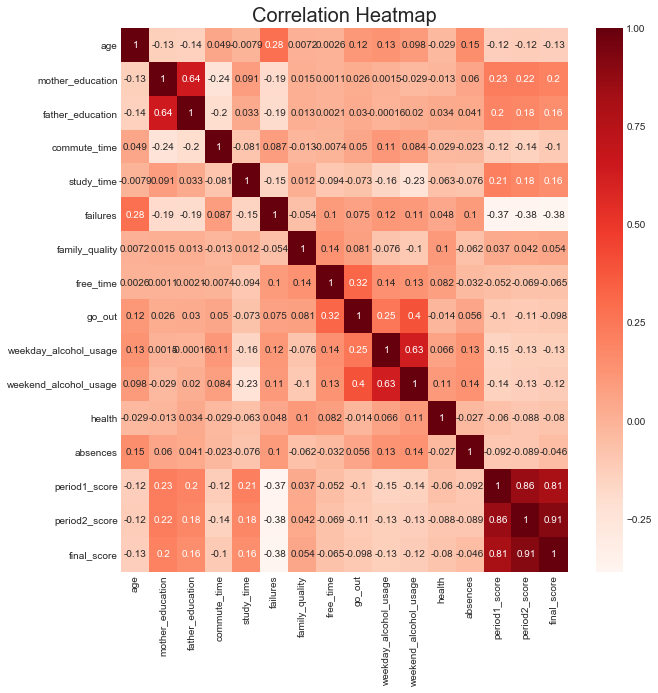

In [9]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

 
 - Period 1, 2 score highly correlates with final result (0.81 and 0.91 respectively)
 - Period 1 score correlates with period 2 score (0.86)
 - Mother's education correlates with father's education (0.64)
 - Frequently consuming alcohol on weekdays more likely to consume alcohol on weekend (0.63)
 - Hanging out frequently has higher chance to consume more alcohol on weekend (0.4)
 - Having more freetime tends to go out more often (0.32)
 - Age correlates with failures (0.28)
 - Students whose mother with higher education tend to perform better on period 1, 2 and final (0.23, 0.22 and 0.2 respectively).
 - Spending more time on studying offers better chance to score higher on period 1, 2 and final (0.21, 0.18 and 0.16) 
 

**Distance from good student's mother education and father education is smaller than or equal 2**

In [10]:
# Subtraction of final score and period 2 score
print('The score is from 0 to 20:')
period2_score = df.period2_score
final_score = df.final_score

print('Average subtraction of final score and period 2 score: ',np.mean(final_score -period2_score)) # Output data
print('Max subtraction of final score and period 2 score: ',np.max(final_score - period2_score)) # Output data
print('Min subtraction of final score and period 2 score: ',np.min(final_score - period2_score)) # Output data

# Absolute of subtraction of mother_education and father_education
period2_score_good_student = df.period2_score[df.final_grade == 'good']
final_score_good_student = df.final_score[df.final_grade == 'good']
print('Average subtraction of  good student\'s final score and period 2 score: ',np.mean(final_score_good_student - period2_score_good_student)) # Output data
print('Max subtraction of good student\'s final score and period 2 score: ',np.max(final_score_good_student - period2_score_good_student))
print('Min subtraction of good student\'s final score and period 2 score: ',np.min(final_score_good_student - period2_score_good_student)) # Output data

# Output data


The score is from 0 to 20:
Average subtraction of final score and period 2 score:  0.09578544061302682
Max subtraction of final score and period 2 score:  6
Min subtraction of final score and period 2 score:  -10
Average subtraction of  good student's final score and period 2 score:  0.5147058823529411
Max subtraction of good student's final score and period 2 score:  6
Min subtraction of good student's final score and period 2 score:  -2


## 4.3 Final Grade By Romantic Status

** Should you allow your future kids to have a high school romantic relationship?**


In [11]:
# romantic status
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
romance_tab1 = pd.crosstab(index=df.final_grade, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)
romance_perc1 = romance_tab1.apply(perc).reindex(index)
print('Romance tab1: ',romance_tab1)
print('Romance tab: ',romance_tab)


Romance tab1:  romantic      no  yes
final_grade          
fair         404  206
good         137   67
poor         132   98
Romance tab:  romantic           no       yes
final_grade                    
fair         6.001415  5.327876
good         4.919981  4.204693
poor         4.882802  4.584967


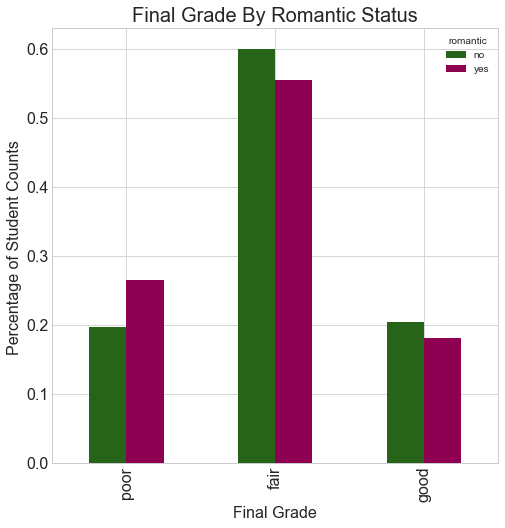

In [12]:
fig = plt.figure()
tem = romance_perc1.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

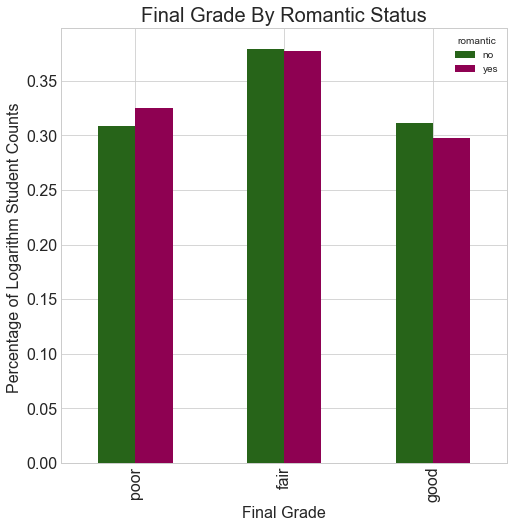

In [13]:
fig = plt.figure()
tem = romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Hypothesis Testing confirmed romantic status has a significant correlation with a final grade.**

In [14]:
#chi-square test result -- significant!
import statsmodels.api as sm
romance_table = sm.stats.Table(romance_tab1)
romance_rslt = romance_table.test_nominal_association()
romance_rslt.pvalue

0.038810128743959726

** Suggestion 1: Shouldn't be high school romance **

## 4.4 Final Grade By Alcohol Consumption

**Should you allow your future kids to consume alcohol during the weekend?**


In [15]:
# weekend alcohol consumption
alc_tab1 = pd.crosstab(index=df.final_grade, columns=df.weekend_alcohol_usage)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)
print(alc_tab1)
print(alc_tab)
print(alc_perc)

weekend_alcohol_usage    1    2    3   4   5
final_grade                                 
fair                   223  143  113  89  42
good                    97   46   39  13   9
poor                    78   46   48  36  22
weekend_alcohol_usage         1         2         3         4         5
final_grade                                                            
fair                   5.407172  4.962845  4.727388  4.488636  3.737670
good                   4.574711  3.828641  3.663562  2.564949  2.197225
poor                   4.356709  3.828641  3.871201  3.583519  3.091042
weekend_alcohol_usage         1         2         3         4         5
final_grade                                                            
poor                   0.303845  0.303376  0.315703  0.336889  0.342462
fair                   0.377106  0.393248  0.385527  0.421979  0.414103
good                   0.319049  0.303376  0.298770  0.241132  0.243435


In [16]:
# create good student dataframe
good = df.loc[df.final_grade == 'good']
good['good_alcohol_usage']=good.weekend_alcohol_usage
# create poor student dataframe
poor = df.loc[df.final_grade == 'poor']
poor['poor_alcohol_usage']=poor.weekend_alcohol_usage

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


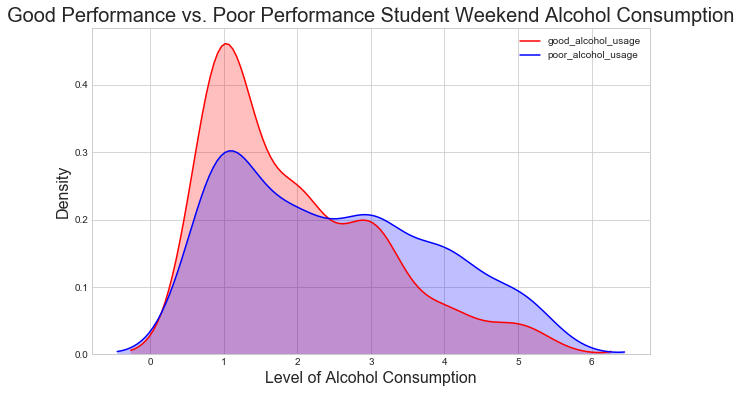

In [17]:

plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['good_alcohol_usage'], shade=True, color="r")
p1=sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="b")
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)
plt.show()

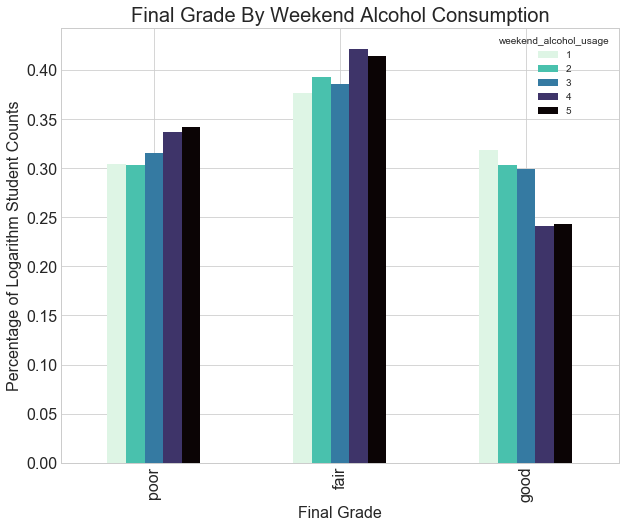

In [18]:
alc_perc.plot.bar(colormap="mako_r", figsize=(10,8), fontsize=16)
plt.title('Final Grade By Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Hyphothesis Testing confirmed, weekend alcohol consumption has a significant correlation with final grade.**

In [19]:
# chi-square test result -- significant!
import statsmodels.api as sm
alc_table = sm.stats.Table(alc_tab1)
alc_rslt = alc_table.test_nominal_association()
alc_rslt.pvalue


0.0075922940563682983

**Suggestion 2: No drinking! No way! **

## 4.5 Final Grade By Parents Education Level

** Does your education level influence your future kids? **

In [61]:
good['good_student_father_education'] = good.father_education
poor['poor_student_father_education'] = poor.father_education
good['good_student_mother_education'] = good.mother_education
poor['poor_student_mother_education'] = poor.mother_education


3     2
5     3
8     2
9     4
14    2
Name: good_student_father_education, dtype: int64


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

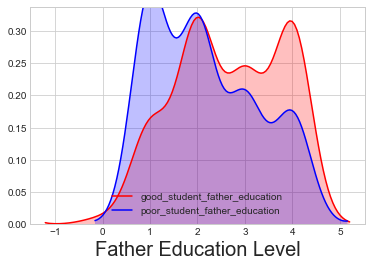

In [21]:
# see the difference between good and poor performers' father education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p2=sns.kdeplot(good['good_student_father_education'], shade=True, color="r")
p2=sns.kdeplot(poor['poor_student_father_education'], shade=True, color="b")
plt.xlabel('Father Education Level', fontsize=20)
plt.show()

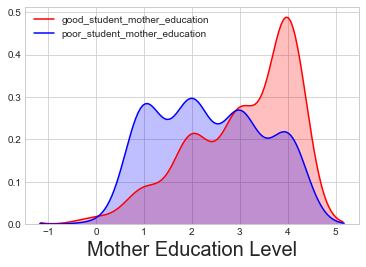

In [22]:
# see the difference between good and poor performers' mother education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p3=sns.kdeplot(good['good_student_mother_education'], shade=True, color="r")
p3=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b")
plt.xlabel('Mother Education Level', fontsize=20)
plt.show()

**OLS tells that parents' education level has a positive correlation with students' final score. Comparatively, mother's education level has bigger influence than father's education level!**

In [23]:
# use OLS to see coefficients
X_edu = df[['mother_education','father_education']]
y_edu = df.final_score
edu = sm.OLS(y_edu, X_edu)
results_edu = edu.fit()
results_edu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_score   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     2287.
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        14:38:52   Log-Likelihood:                -3194.8
No. Observations:                1044   AIC:                             6394.
Df Residuals:                    1042   BIC:                             6403.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
mother_education     2.4078      0.166     14.527      0.000       2.083       2.733
father_education     1.5746      0.179      8.806      0.000       1.224       1.926
==============================================================================
Omnibus:                       35.858   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.773
Skew:                          -0.427   Prob(JB):                     2.31e-09
Kurtosis:                       3.430   Cond. No.                         5.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Suggestion 3 If you're woman, study hard; if you're a guy, marry someone with higher education. **

## 4.6 Final Grade By Frequency Of Going Out

**Should you let your future kids frequently hang out with their friends** 

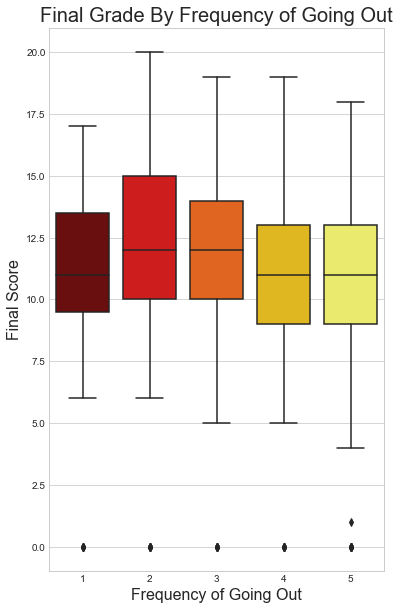

In [24]:
# going out with friends (numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,10))
sns.boxplot(x='go_out', y='final_score', data=df, palette='hot')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)
plt.show()

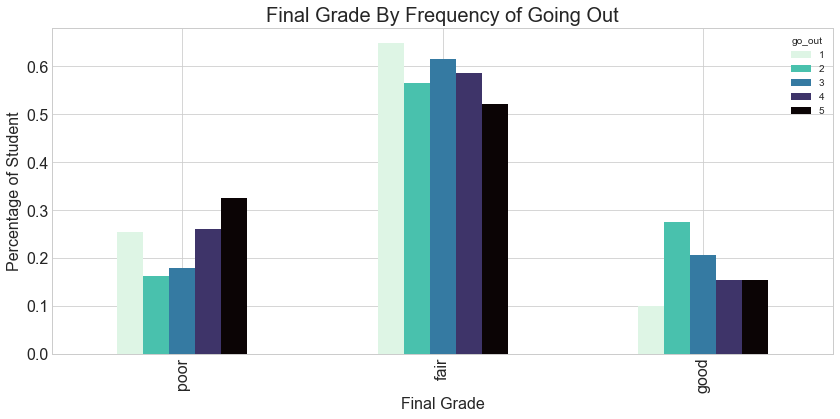

In [25]:
out_tab = pd.crosstab(index=df.final_grade, columns=df.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Hyphothesis Testing confirmed, the frequency of going out with friends has a significant correlation with students' final performance.**



In [26]:
# chi-square test result -- significant!
out_table = sm.stats.Table(out_tab)
out_rslt = out_table.test_nominal_association()
out_rslt.pvalue

4.3651983282821938e-05

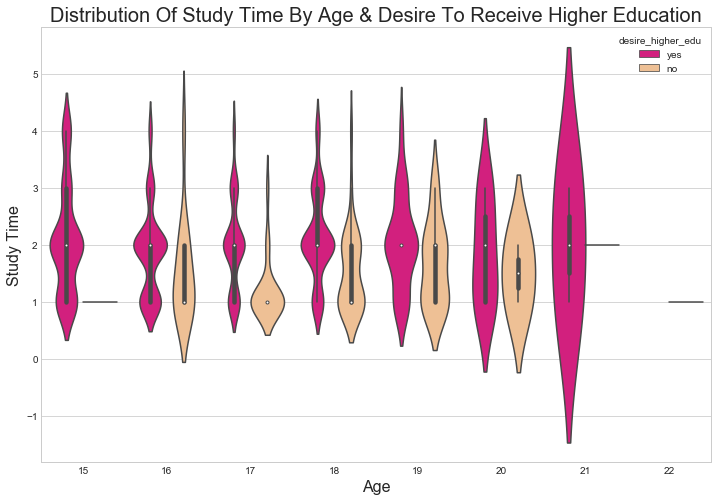

In [27]:
# Desire for higher education and study time by age 
plt.figure(figsize=(12,8))
sns.violinplot(x='age', y='study_time', hue='desire_higher_edu', data=df, palette="Accent_r", ylim=(1,6))
plt.title('Distribution Of Study Time By Age & Desire To Receive Higher Education', fontsize=20)
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.show()

**Suggestion 4: Limit the frequently of kids going out**

## 4.7 Final Grade By Desire To Go To College

**Should you push your future kids work towards receiving higher education?**


In [28]:
higher_tab = pd.crosstab(index=df.final_grade, columns=df.desire_higher_edu)
higher_perc = higher_tab.apply(perc).reindex(index)

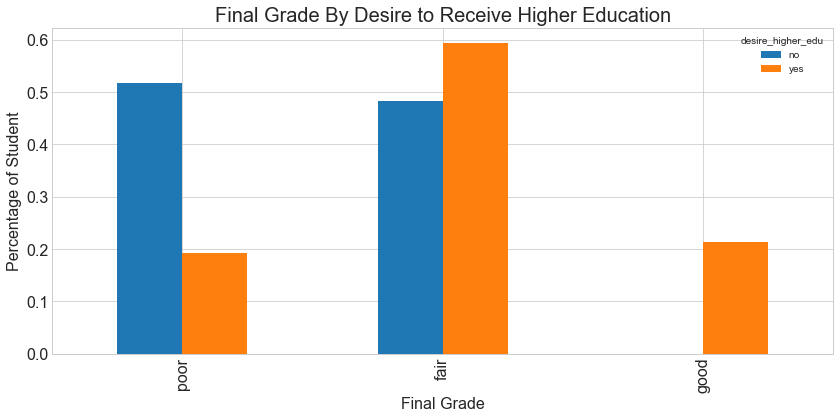

In [29]:
higher_perc.plot.bar(figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)
plt.show()

**Hyphothesis Testing confirmed, the desire of going to college has a significant correlation with students' final performance.**

In [30]:
# chi-square test result -- significant!
import statsmodels.api as sm
higher_table = sm.stats.Table(higher_tab)
higher_rslt = higher_table.test_nominal_association()
higher_rslt.pvalue

1.7852386235972517e-13

**Suggestion 5: Tell your kids how to great and fun going to college can be **

## 4.8 Final Grade By Living Area

**Should your family move to the countryside?**


In [31]:
# living area: urban vs. rural
df.address = df.address.map({'U':'Urban', 'R':'Rural'})

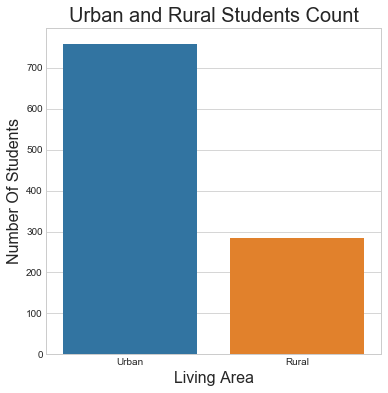

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(df.address)
plt.title('Urban and Rural Students Count', fontsize=20)
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()

In [33]:
ad_tab1 = pd.crosstab(index=df.final_grade, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)

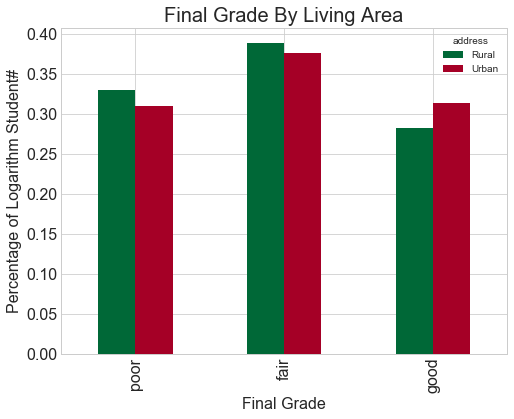

In [34]:
ad_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.title('Final Grade By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Hyphothesis Testing confirmed, the frequency of going out with friends has a significant correlation with students' final performance.**

In [35]:
# chi-square test result -- significant! <0.05 => significant
ad_table = sm.stats.Table(ad_tab1)
ad_rslt = ad_table.test_nominal_association()
ad_rslt.pvalue

0.0076089105178736016

In [36]:
# explore other variables via OLS
dfl = df.copy()
X_ols = dfl.drop(['period1_score', 'period2_score', 'final_score','final_grade', 'failures','study_time','absences'], axis=1)
X_ols = pd.get_dummies(X_ols)

In [37]:
mod = sm.OLS(df.final_score, X_ols)
mod = mod.fit()


**Suggestion 6: Stay in the city**

# 5. Classification
**Use Students' Information To Predict Their Final Grade**

In [38]:
# create dataframe dfd for classification
dfd = df.copy()
dfd = dfd.drop([ 'final_score'], axis=1)

## 5.1 Prepare Dataset for Modelling

In [39]:
# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.final_grade)

In [40]:
# dataset train_test_split
from sklearn.model_selection  import train_test_split
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [41]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


In [42]:
# see total number of features
len(list(X_train))

58

In [43]:
# see total number of features
len(list(y_train))


730

In [44]:
# see total number of features
len(list(X_test))

58

In [45]:
# see total number of features
len(list(y_test))

314

## 5.2 Decision Tree Classification

In [46]:
# find the optimal # of minimum samples leaf
from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,58):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
max_msl = msl.where(msl==msl.max()).dropna()
print(max_msl)
index_max_msl = max_msl.index[0] # Get index you need
print(index_max_msl)

12    0.869427
dtype: float64
12


In [47]:
# final model
print('Index max msl: ',index_max_msl)
tree = DecisionTreeClassifier(min_samples_leaf=index_max_msl)
t= tree.fit(X_train, y_train)
print("Decisioin Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

dtc_score = np.zeros(2)
dtc_score[0] = t.score(X_train, y_train)
dtc_score[1] = t.score(X_test, y_test)
dtc_score

Index max msl:  12
Decisioin Tree Model Score : 0.915068493151 , Cross Validation Score : 0.856687898089


array([ 0.91506849,  0.8566879 ])

## 5.3 Random Forest Classification

In [48]:
# find a good # of estimators
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier()
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
max_ne = ne.where(ne==ne.max()).dropna()
index_max_ne_1 = max_ne.index[0]
print(index_max_ne_1)

10


In [49]:
# find a good # of min_samples_leaf
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=index_max_ne_1, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
max_ne = ne.where(ne==ne.max()).dropna()
index_max_ne_2 = max_ne.index[0]
print(max_ne)
print(index_max_ne_2)

9    0.83121
dtype: float64
9


In [50]:
# final model
print('Index max ne: ',index_max_ne_1,index_max_ne_2)
forest = RandomForestClassifier(n_estimators=index_max_ne_1, min_samples_leaf=index_max_ne_2)
f = forest.fit(X_train, y_train)
print("Random Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

rfc_score = np.zeros(2)
rfc_score[0] = (f.score(X_train, y_train))
rfc_score[1] = (f.score(X_test, y_test))

Index max ne:  10 9
Random Forest Model Score : 0.864383561644 , Cross Validation Score : 0.792993630573


## 5.4 Support Vector Classification

In [51]:
from sklearn.svm import SVC
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

svc_score = np.zeros(2)
svc_score[0] = (s.score(X_train, y_train))
svc_score[1] = (s.score(X_test,y_test))


SVC Model Score : 0.93698630137 , Cross Validation Score : 0.831210191083


## 5.5 Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [53]:
# find optimal # of features to use in the model
from sklearn.feature_selection import SelectKBest, chi2

ks=[]
for i in range(1,58):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(X_train,y_train)
    x_new_test=sk.fit_transform(X_test,y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)  
    
ks = pd.Series(ks)
ks = ks.reindex(list(range(1,58)))

In [54]:
max_ks = ks.where(ks==ks.max()).dropna()
index_max_ks = max_ks.index[0]
print(max_ks)
print(index_max_ks)

1    0.875796
dtype: float64
1


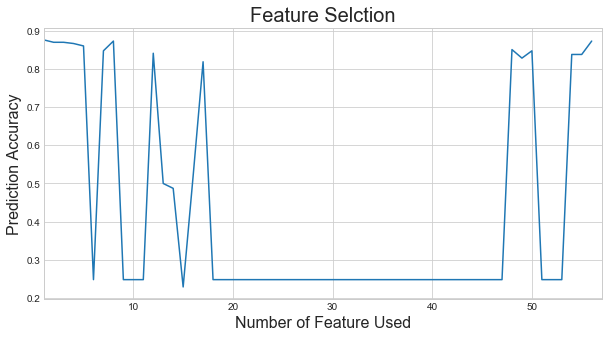

In [55]:
plt.figure(figsize=(10,5))
ks.plot.line()
plt.title('Feature Selction', fontsize=20)
plt.xlabel('Number of Feature Used', fontsize=16)
plt.ylabel('Prediction Accuracy', fontsize=16)
plt.show()

In [56]:
# final model
print('Index max ks: ', index_max_ks)
sk = SelectKBest(chi2, k=index_max_ks)
x_new = sk.fit_transform(X_train,y_train)
x_new_test=sk.fit_transform(X_test,y_test)
lr = lr.fit(x_new, y_train)
print("Logistic Regression Model Score" , ":" , lr.score(x_new, y_train) , "," ,
      "Cross Validation Score" ,":" , lr.score(x_new_test, y_test))


lrc_score = np.zeros(2)
lrc_score[0] = (lr.score(x_new, y_train))
lrc_score[1] = (lr.score(x_new_test, y_test))


Index max ks:  1
Logistic Regression Model Score : 0.887671232877 , Cross Validation Score : 0.831210191083


## 5.6 Ada Boost Classification


In [57]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=2)
af = ada.fit(X_train, y_train)
print("Ada Boost Model Score" , ":" , af.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , af.score(X_test, y_test))


abc_score = np.zeros(2)
abc_score[0] = (af.score(X_train, y_train))
abc_score[1] = (af.score(X_test, y_test))


Ada Boost Model Score : 0.852054794521 , Cross Validation Score : 0.875796178344


## 5.7 Stochastic Gradient Descent Classification

In [58]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sf = sgd.fit(X_train, y_train)
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , sf.score(X_test, y_test))


sgc_score = np.zeros(2)
sgc_score[0] = (sf.score(X_train, y_train))
sgc_score[1] = (sf.score(X_test, y_test))

Stochastic Gradient Descent Model Score : 0.769863013699 , Cross Validation Score : 0.767515923567


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


## 5.8 Model Selection

Let's compare the performance of each model!



In [59]:

msm = np.array([dtc_score,rfc_score,svc_score,lrc_score,abc_score,sgc_score])
msm = pd.DataFrame(msm,columns = ['model_score','validation_score'])
model = np.array(['Decision tree','Random forest','Support vector','Logistic regression','Ada boost','Stochastic gradient descent'])
model = pd.DataFrame(model,columns = ['classification'])
msm = pd.DataFrame([model.classification,msm.model_score,msm.validation_score])
msm = msm.T
msm


,classification,model_score,validation_score
0,Decision tree,0.915068,0.856688
1,Random forest,0.864384,0.792994
2,Support vector,0.936986,0.83121
3,Logistic regression,0.887671,0.83121
4,Ada boost,0.852055,0.875796
5,Stochastic gradient descent,0.769863,0.767516


In [60]:
print('We choose this model: ')
max_msm = msm.where(msm.validation_score == msm.validation_score.max()).dropna()
max_msm



We choose this model: 


,classification,model_score,validation_score
4,Ada boost,0.852055,0.875796


# 6. Summary



**The valedictorian of the high school class is likely to have this profile:**
 
*   Is not in a romantic relationship
*   Does not consume alcohol
*   Living  in urban area
*   Does not go out with friends frequently
*   Have strong desire of receiving higher education
*   Parents both received higher education







